<a href="https://colab.research.google.com/github/youngwoo3283/project2-section02/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 롤 데이터를 이용한 승부예측

- 사용할 데이터셋 : 최상위 티어의 경기 기록

- 문제 정의 : 프로팀에서 승률을 올리기 위한 전략의 필요성

- 시나리오 : 롤 프로팀에서 승률이 안 좋은 팀을 위해서 데이터를 분석한 전략을 세우려고 한다. 프로게이머팀은 승률이 높아야 인기가 많으며 스폰서 및 광고를 통해서 수익을 올릴 수 있기 때문에 승리가 중요하다.
   - 이때 승리/패배의 이진 분류를 사용한다.
   - 타겟값 : 게임의 승리/패배


## 가설 
- 4용을 처치하는게 유리하여서 4용이 게임에 승패에 영향을 미칠 것이다.
- 첫번째 타워를 부수는 것이 승패에 영향을 미칠 것이다.
- 게임이 길어지면 승패에 영향을 미칠까??


- 스펠은 어떤 것을 많이 들고 영향이 있을까?
- 어떤 챔피언이 픽률이 좋고 어떤 챔피언이 밴을 가장 잘 될까??

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_game = pd.read_csv('/content/drive/MyDrive/archive (2)/games.csv')

# 데이터 준비하기
 - 타겟 : winner

In [114]:
data_game.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [115]:
data_champ = pd.read_json('/content/drive/MyDrive/archive (2)/champion_info.json')

In [116]:
data_champ2 = pd.read_json('/content/drive/MyDrive/archive (2)/champion_info_2.json')

In [117]:
data_spell = pd.read_json('/content/drive/MyDrive/archive (2)/summoner_spell_info.json')

In [118]:
champInfo = pd.read_json((data_champ['data']).to_json(), orient='index') 

In [119]:
champInfo2 = pd.read_json((data_champ2["data"]).to_json(),orient = "index")

In [120]:
champInfo.set_index(['id'], inplace=True)




In [121]:

data_spell_info = pd.read_json((data_spell['data']).to_json(), orient='index')

data_game2 = pd.read_csv('/content/drive/MyDrive/archive (2)/games.csv')

winner = data_game2[["winner"]]
winner = winner.T
winner.shape

(1, 51490)

In [122]:
#name_dict = pd.Series(champInfo.key.values,index=champInfo.id).to_dict()

In [250]:
data_spell_info

,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."
21,21,4,Barrier,SummonerBarrier,Shields your champion from 115-455 damage (dep...
3,3,4,Exhaust,SummonerExhaust,"Exhausts target enemy champion, reducing their..."
30,30,1,To the King!,SummonerPoroRecall,Quickly travel to the Poro King's side.
31,31,1,Poro Toss,SummonerPoroThrow,"Toss a Poro at your enemies. If it hits, you c..."
32,32,1,Mark,SummonerSnowball,Throw a snowball in a straight line at your en...


In [123]:
champInfo2

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu
...,...,...,...,...,...
Zac,"[Tank, Fighter]",the Secret Weapon,154,Zac,Zac
Zed,"[Assassin, Fighter]",the Master of Shadows,238,Zed,Zed
Ziggs,[Mage],the Hexplosives Expert,115,Ziggs,Ziggs
Zilean,"[Support, Mage]",the Chronokeeper,26,Zilean,Zilean


In [124]:
data_game.winner

0        1
1        1
2        1
3        1
4        1
        ..
51485    2
51486    2
51487    2
51488    2
51489    1
Name: winner, Length: 51490, dtype: int64

# 가장 인기 있는 챔피언과 금지율이 제일 높은 챔피언 찾기

In [125]:
data_game2 = pd.read_csv('/content/drive/MyDrive/archive (2)/games.csv')


In [126]:
def idToName(ID, dic):
    '''
    ID: champion ID as listed in original dataframe
    dic: champInfo from json, defined above

    used to convert ID's to champion names
    '''
    champ = dic['name'][ID]
    return champ

def getTag(name, data):
    '''
    name: champion name as listed in dataframe
    data: champInfo

    used to get primary tag from champInfo
    '''
    tags = data['tags'][name][0]
    return tags

def numToColor(data):
    '''
    data: main dataframe

    used to get color of team from 0 or 1
    '''
    if data == 0:
        color = 'blue'
    else:
        color = 'red'
    return color

In [127]:
jDict = pd.read_json('/content/drive/MyDrive/archive (2)/champion_info_2.json')

In [128]:
champInfo = pd.read_json((jDict['data']).to_json(), orient='index')
champInfo.head()

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu


In [129]:
champInfo.set_index(['id'], inplace=True)
champInfo.head()

,tags,title,key,name
id,,,,
266,"[Fighter, Tank]",the Darkin Blade,Aatrox,Aatrox
103,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri,Ahri
84,[Assassin],the Fist of Shadow,Akali,Akali
12,"[Tank, Support]",the Minotaur,Alistar,Alistar
32,"[Tank, Mage]",the Sad Mummy,Amumu,Amumu


In [130]:
champCols = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id']
banCols = ['t1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5',]

In [131]:
for c in champCols:
    data_game2[c] = data_game2[c].apply(lambda x: idToName(x, champInfo))

for c in banCols:
    data_game2[c] = data_game2[c].apply(lambda x: idToName(x, champInfo)) 

In [132]:
data_game2[champCols].head()


,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id
0,Vladimir,Bard,Kog'Maw,Master Yi,Viktor,Graves,Xayah,Darius,Zed,Thresh
1,Draven,Irelia,Nidalee,Kayle,Shaco,Malphite,Morgana,Hecarim,Yasuo,Riven
2,Tristana,Kayn,Nami,Rumble,Kassadin,Cassiopeia,Thresh,Jayce,Jax,Ashe
3,Maokai,Brand,Twitch,Orianna,Dr. Mundo,Malzahar,Warwick,Thresh,Riven,Ashe
4,Warwick,Twitch,Janna,Draven,Syndra,Sona,Jarvan IV,Kayn,Kassadin,Caitlyn


In [133]:
data_game2[banCols].head()

,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,Riven,Janna,Cassiopeia,Draven,Kayn,Fiora,Vayne,Karma,Soraka,Caitlyn
1,Caitlyn,Darius,Teemo,Xayah,Warwick,Master Yi,Vayne,Zed,Caitlyn,Illaoi
2,Lulu,Janna,Twitch,Soraka,Blitzcrank,Yasuo,Zed,Kha'Zix,Maokai,Evelynn
3,Zed,Vayne,Ornn,Fiora,Cho'Gath,Camille,Tristana,Kayn,Janna,Caitlyn
4,Malzahar,Lee Sin,Thresh,Morgana,Cho'Gath,Garen,Master Yi,Braum,Darius,Tristana


In [134]:
champInfo.set_index(['name'],inplace=True)
champInfo.head()

,tags,title,key
name,,,
Aatrox,"[Fighter, Tank]",the Darkin Blade,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,Ahri
Akali,[Assassin],the Fist of Shadow,Akali
Alistar,"[Tank, Support]",the Minotaur,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,Amumu


In [135]:
for col in champCols:
    data_game2[col + '_tags'] = data_game2[col].apply(lambda x: getTag(x, champInfo))
data_game2.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t1_champ1id_tags,t1_champ2id_tags,t1_champ3id_tags,t1_champ4id_tags,t1_champ5id_tags,t2_champ1id_tags,t2_champ2id_tags,t2_champ3id_tags,t2_champ4id_tags,t2_champ5id_tags
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,Mage,Support,Marksman,Assassin,Mage,Marksman,Marksman,Fighter,Assassin,Support
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,Marksman,Fighter,Assassin,Fighter,Assassin,Tank,Mage,Fighter,Fighter,Fighter
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,Marksman,Fighter,Support,Fighter,Assassin,Mage,Support,Fighter,Fighter,Marksman
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,Tank,Mage,Marksman,Mage,Fighter,Mage,Fighter,Support,Fighter,Marksman
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,Fighter,Marksman,Support,Marksman,Mage,Support,Tank,Fighter,Assassin,Marksman


In [136]:
sumPicks = pd.concat([data_game2['t1_champ1id'],data_game2['t1_champ2id'],data_game2['t1_champ3id'],data_game2['t1_champ4id'],data_game2['t1_champ5id'],
                      data_game2['t2_champ1id'],data_game2['t2_champ2id'],data_game2['t2_champ3id'],data_game2['t2_champ4id'],data_game2['t2_champ5id']],
                      ignore_index=True)
sortedPicks = sorted(sumPicks)
sumBans = pd.concat([data_game2['t1_ban1'],data_game2['t1_ban2'],data_game2['t1_ban3'],data_game2['t1_ban4'],data_game2['t1_ban5'],
                     data_game2['t2_ban1'],data_game2['t2_ban2'],data_game2['t2_ban3'],data_game2['t2_ban4'],data_game2['t2_ban5']],
                     ignore_index=True)
sortedBans = sorted(sumBans)

Text(0.5, 1.0, 'Champion Bans')

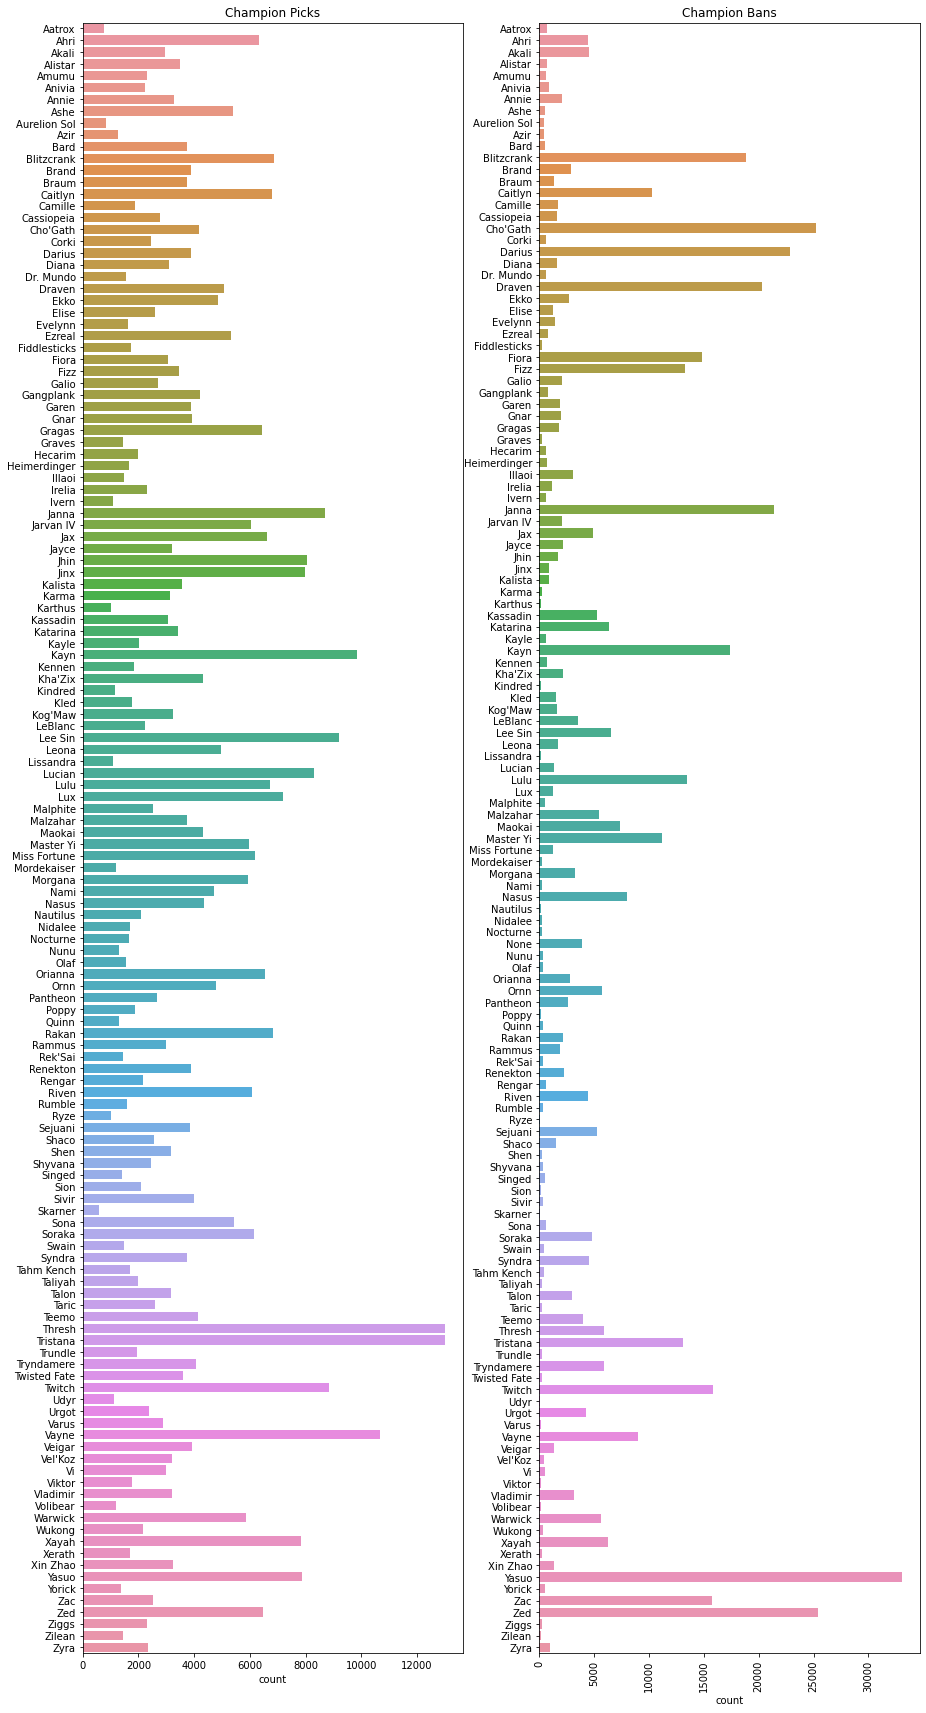

In [137]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=sortedPicks, data=data_game2, ax=ax1)
sns.countplot(y=sortedBans, data=data_game2, ax=ax2)
ax1.set_title('Champion Picks')
ax2.set_title('Champion Bans')

# 데이터 전처리하기

먼저 타겟값의 불균형을 확인하자
- 1은 1팀이 이겼다는 뜻이고 2는 2팀이 이겼다는 뜻이다
- 딱 봐도 비슷하니 딱히 불균형 해소를 위한 스케일링은 필요없다

In [138]:
data_game.winner.value_counts()

1    26077
2    25413
Name: winner, dtype: int64

(보류)이때 원활한 분석을 위해서 타겟을 1과 2에서 1과 0으로 바꾼다
- 1팀을 기준으로 해서 1팀이 이기면 그냥 1로 2팀이 이기면 0으로 바꾸자
- 타겟에 2씩 뺀다 그럼 2는 0이 되고 1은 -1이 되는데 이때 abs()로 절대값으로 1로 바꿔준다

In [139]:
#data_game.winner = abs(data_game.winner - 2)

In [140]:
#data_game.winner

### 선택한 챔피언과 금지한 챔피언 정보는 따로 저장한다

1.   항목 추가
2.   항목 추가



In [141]:
champs = data_game[["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5"]]

In [142]:
champs

,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,8,432,96,11,112,104,498,122,238,412,92,40,69,119,141,114,67,43,16,51
1,119,39,76,10,35,54,25,120,157,92,51,122,17,498,19,11,67,238,51,420
2,18,141,267,68,38,69,412,126,24,22,117,40,29,16,53,157,238,121,57,28
3,57,63,29,61,36,90,19,412,92,22,238,67,516,114,31,164,18,141,40,51
4,19,29,40,119,134,37,59,141,38,51,90,64,412,25,31,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,19,429,91,432,64,45,83,67,40,79,114,18,11,157,497,55,-1,90,238,157
51486,90,32,31,412,18,102,429,89,75,45,157,164,122,99,420,157,55,119,154,105
51487,141,18,432,81,68,1,119,33,43,99,238,31,24,53,11,113,122,53,11,157
51488,121,236,420,201,99,21,56,25,30,11,119,64,51,157,29,154,39,51,90,114


### 유저가 선택한 캐릭터나 밴한 캐릭터는 따로 저장했으니 제외하고 게임 id는 분석에서 의미없으니 데이터에서 제외한다.

### gameid와 creationtime도 분석에 필요없으니 제외한다

In [143]:
data_game.drop(["t1_champ1id","t1_champ2id",
                      "t1_champ3id","t1_champ4id","t1_champ5id","t2_champ1id",
                      "t2_champ2id","t2_champ3id","t2_champ4id","t2_champ5id","t1_ban1","t1_ban2","t1_ban3",
                      "t1_ban4","t1_ban5","t2_ban1","t2_ban2","t2_ban3","t2_ban4","t2_ban5","seasonId"],axis = 1,inplace = True)

In [144]:
data_game.drop(["gameId"],axis = 1,inplace = True)
data_game.drop(["creationTime"],axis = 1,inplace = True)


In [145]:
data_game.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,t1_champ1_sum2,...,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
0,1949,1,2,1,1,1,1,2,12,4,...,4,14,4,4,3,5,0,0,1,1
1,1851,1,1,1,1,0,1,1,7,4,...,4,4,14,4,7,2,0,0,0,0
2,1493,1,2,1,1,1,2,0,4,7,...,12,4,11,7,4,2,0,0,1,0
3,1758,1,1,1,1,1,1,0,4,12,...,3,4,14,4,7,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,4,12,...,4,4,12,4,7,3,0,0,1,0


### 게임 시간과 관련된 전처리

- 게임 시간이 엄청 짧은 것들은 게임 시간이 3분이 되기전에 플레이어가 게임을 나감으로써 인한 게임이 조기에 종료되는 것을 의미함으로 데이터에서 삭제한다
- (도메인) 통상적으로 게임은 15분 이후에 항복을 할 수 있다. 하지만 15분 이전에 게임이 끝난 것은 대부분 경기 외적인 이슈(트롤,게임나감)로 인한 것이니 분석에 의미가 없으므로 제거한다

게임 지속시간과 관련된 그래프를 보면 0에서 300초 사이에 몇건의 게임이 있는 것을 확인 할 수 있다

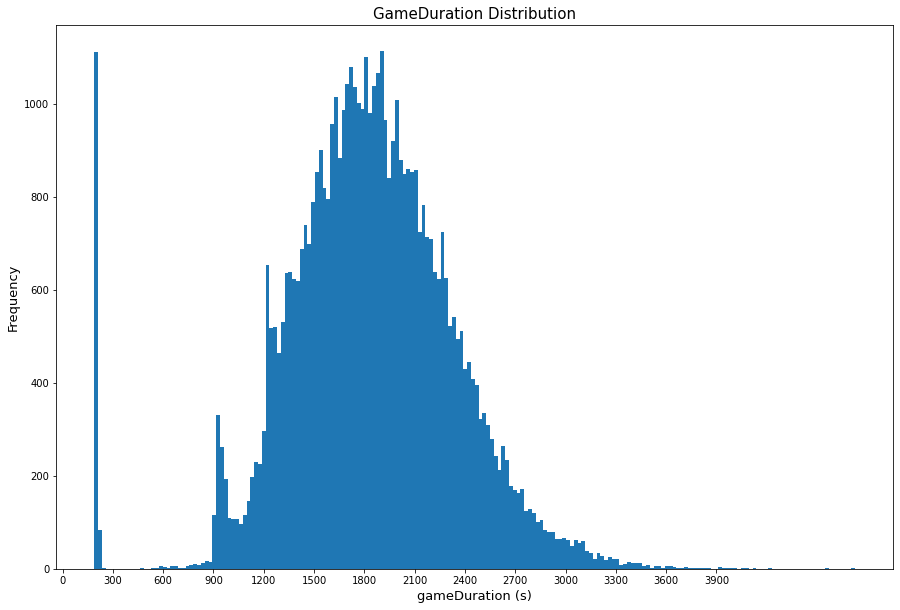

In [146]:
def pltDuration(data):
    plt.figure(figsize = (15, 10))
    Duration_plot = plt.hist(data['gameDuration'], bins = 200)
    my_x_ticks = np.arange(0, 4200, 300)
    plt.xticks(my_x_ticks)
    plt.xlabel("gameDuration (s)", fontsize = 13)
    plt.ylabel('Frequency', fontsize = 13)
    plt.title('GameDuration Distribution', fontsize = 15)
    plt.show()
pltDuration(data_game)

아래 데이터를 보면 인덱스 51378 게임시간이 10분이 되었는데 게임이 끝났고 억제기는 1개만 파괴되고 용이나 바론등은 하나도 획득하지 않은 것으로 보인다. 따라서 정상적인 게임이라고 할 수 없다

In [147]:
data_game.query('gameDuration < 900')

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,t1_champ1_sum2,...,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills
64,197,2,0,0,0,0,0,0,4,3,...,4,12,4,4,14,0,0,0,0,0
82,193,1,1,0,0,0,0,0,4,14,...,7,4,14,3,14,0,0,0,0,0
119,192,1,1,0,0,0,0,0,6,4,...,7,3,4,4,11,0,0,0,0,0
149,208,1,1,0,0,0,0,0,11,4,...,11,3,4,14,4,0,0,0,0,0
276,201,1,1,0,0,0,0,0,6,4,...,12,4,11,6,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51359,202,1,2,0,0,0,0,0,11,4,...,21,4,21,11,4,0,0,0,0,0
51378,613,1,1,1,1,0,0,0,11,4,...,3,4,7,4,12,0,0,0,0,0
51412,194,2,2,0,0,0,0,0,4,14,...,3,4,12,4,12,0,0,0,0,0
51417,197,2,0,0,0,0,0,0,6,4,...,7,12,4,6,4,0,0,0,0,0


In [148]:
idx=data_game.query('gameDuration < 900').index

In [149]:
data_game.drop(index = idx,inplace = True )

In [150]:
data_game.query('gameDuration < 900')

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,t1_champ1_sum2,...,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills


# 스펠 분석을 하기 위한 전처리 과정
- 각 라인에서 주로 쓰이는 스펠을 조사한다
- 만약 한 라인이라도 주로 쓰이는 스펠을 들지 않을때 승률이 올라가는지를 확인하고 싶다
- 주로 쓰이는 스펠을 들고 있는지 (yes:1 no : 0) 칼럼을 만들자

## 스펠 설명

- 1 : 정화 
- 3 : 탈진
- 4 : 점멸
- 6 : 유체화
- 7 : 힐
- 11 : 강타
- 12 : 순간이동
- 14 : 점화
- 21 : 방어막

[스킬에 대한 정보](https://namu.wiki/w/%EC%86%8C%ED%99%98%EC%82%AC%20%EC%A3%BC%EB%AC%B8#s-4.2)

### 가장 많이 쓰이는 스펠

- 경험법칙과 [통계](https://www.leagueofgraphs.com/champions/spells/master/sr-ranked)를 기반으로 조사
- 텔레포트, 강타, 점멸, 힐, 탈진라고 예상함 (각 라인별 특성 및 도메인)


팀당 스펠을 종합하여서 중복을 제거하고 나열하였을때에 만약 저 5개가 스펠만 있는지? 혹은 다른 스펠을 쓰고 있는지를 칼럼으로 만들자

In [151]:
chap_sum= [i for i in data_game.columns if 'sum' in i]

In [152]:
data_sum = data_game[chap_sum]
data_sum.head()

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,t2_champ1_sum1,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2
0,12,4,3,4,4,7,11,6,4,14,11,4,4,7,6,4,14,4,4,3
1,7,4,12,4,4,3,4,14,4,11,4,12,4,14,11,4,4,14,4,7
2,4,7,11,4,3,4,4,12,12,4,4,7,14,4,4,12,4,11,7,4
3,4,12,4,14,4,7,4,1,11,4,14,4,11,4,4,3,4,14,4,7
4,4,12,11,4,4,3,4,7,7,4,3,4,4,12,11,4,4,12,4,7


In [153]:
data_sum.iloc[0,9]

14

### 각 경기당 쓰이는 스펠을 조사하여서 가장 많이 쓰이는 스펠 찾기
- 먼저 apply로 인덱스마다(여기서는 각 경기) 스펠을 합치고 set()으로 중복을 제거하여서 ans에 넣어둠
- ans에는 50181개의 리스트로 이루어져 있다. 이 각각의 리스트에는 사용된 스팰이 있다.
- collections 의 Counter()을 이용하여서 각 리스트 안의 스팰을 체크하여서 수를 센다

- Counter()끼리 더해서 ans안에 있는 모든 set의 개수를 세어서 제일 많이 사용된 스펠을 찾는다

In [154]:
data_game.shape[0]

50181

In [155]:
#50181은 data_game.shape[0]으로 데이터에 있는 게임의 경기 수를 의미한다
# for문으로 하나의 인덱스(하나의 경기)마다 1팀(data_sum.iloc[i][:10])과 2팀(data_sum.iloc[i][10:])으로 스펠을 가져오고,
# 이를 value로 어레이로 그 다음에 tolist()로 리스트의 형태로 바꿔준다
# 마지막으로 각 팀당 사용되는 스펠을 조사하는 것이니 중복은 의미가 없으니 set()로 한다음에 각각의 ans에 넣어준다


ans_1 = []
ans_2 = []

for i in range(50181):

  
  li_1  = data_sum.iloc[i][:10].values.tolist()
  li_2  = data_sum.iloc[i][10:].values.tolist()
  

  li_1 = set(li_1)
  li_2 = set(li_2)
  
  ans_1.append(li_1)
  ans_2.append(li_2)

In [156]:
len(ans_1) == len(ans_2) #두 팀의 스펠의 사용여부의 개수가 같음을 확인

True

In [157]:
# 각 경기당 사용된 스펠
# 1팀의 첫번째 ans_1[0](첫번째 경기)는 3,4,6,7,11,12,14의 스펠이 사용되었다는 것을 알 수 있다.
# 두번째 경기 ans[1]에서는 6번이 없다. 그러니까 유체화 스펠이 사용되지 않았다는 것을 확인 할 수 있다.
# 스펠을 숫자로 바꾼 것인데 스펠에 대한 숫자는 위에 명시되어 있다.
ans_1

[{3, 4, 6, 7, 11, 12, 14},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {1, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12, 21},
 {3, 4, 7, 11, 12},
 {4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 14},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12, 21},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {4, 6, 7, 11, 12, 14},
 {4, 7, 11, 12, 14},
 {3, 4, 7, 11, 14},
 {3, 4, 7, 11, 14},
 {3, 4, 7, 11, 12},
 {4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12, 14},
 {4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12, 21},
 {3, 4, 7, 11, 12},
 {1, 3, 4, 7, 11, 12},
 {3, 4, 6, 7, 11, 12},
 {4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12, 21},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {4, 7, 11, 12, 14, 21},
 {3, 4, 7, 11, 12, 14},
 {3, 4, 7, 11, 12},
 {3, 4, 7, 11, 14, 21},
 {4, 6, 7, 11

In [158]:
#Counter()로 각 {}에서 요소의 개수를 value_counts()처럼 카운트 하고 다음 경기도 Counter()한다.
#두 Counter()는 서로 더하면 요소의 개수가 더해지니 전체 사용된 스펠의 개수를 for문으로 조사한다
#이때 처음에는 Counter()를 선언하고 다음부터는 거기에 += 식으로 더해준다 
#따라서 처음 인덱스만 선언하기 위해서 if문을 썼다

#cnt_spell_1에는 우선 1팀의 첫번째 경기에 사용되는 스펠의 종류가 있게된다.
#그 다음에 두번쨰 경기에 사용되는 스펠의 개수가 더해져서 cnt_spell_1에 새로 할당된다.



from collections import Counter

for i in range(50181):
  if i == 0:
    cnt_spell_1 = Counter(ans_1[i])
    cnt_spell_2 = Counter(ans_2[i])
  else:
    cnt_spell_1 += Counter(ans_1[i])
    cnt_spell_2 += Counter(ans_2[i])

In [159]:
cnt_spell_1 #사용량 많은 스펠 : 3,4,7,11,12,14

Counter({3: 37952,
         4: 50181,
         6: 6703,
         7: 49402,
         11: 49976,
         12: 45417,
         14: 33640,
         1: 1482,
         21: 7187})

In [160]:
cnt_spell_2 #사용량 많은 스펠 : 3,4,7,11,12,14

Counter({3: 37917,
         4: 50179,
         6: 6627,
         7: 49334,
         11: 49968,
         14: 33581,
         12: 45507,
         21: 7153,
         1: 1561})

결과 해석

- 가장 많이 사용된 상위 스펠
  - 점멸, 강타, 순간이동, 힐, 탈진, 점화

- 사용량이 적은 스펠
   - 유체화, 정화, 방어막


### 실제로 가설과 일치하는 양상을 보여준다

이것을 토대로 사용량이 적은 스펠을 사용함과 승/패에 영향을 미치는 지를 위해서 각 경기마다 1팀이 상위 5개 스펠만을 사용하였는가? 라는 'spell_use_1'과 2팀이 상위 5개 스펠만을 사용하였는가? 라는 'spell_use_2'라는 칼럼을 만든다.

In [161]:
len(ans_1)

50181

In [162]:
data_game.shape[0]

50181

In [163]:

spell_use_1 = []
spell_use_2 = []

for i in range(50181):

  if {3,4,7,11,12,14} == ans_1[i] or {3,4,7,11,12} == ans_1[i]:
    #여기서는 1이 나와야함 제일 많이 쓰는 스펠만 들고 있으니
    spell_use_1.append('1')
  else:
    spell_use_1.append('0')

  if {3,4,7,11,12,14} == ans_2[i] or {3,4,7,11,12} == ans_2[i]:
    #여기서는 1이 나와야함 제일 많이 쓰는 스펠만 들고 있으니
    spell_use_2.append('1')
  else:
    spell_use_2.append('0')

  

In [164]:
len(spell_use_1) == len(spell_use_2) #둘다 50181으로 잘 수행됨

True

In [165]:
#칼럼 생성하기

data_game['spell_use_1'] = spell_use_1

data_game['spell_use_2'] = spell_use_2


In [166]:
data_game.head()

,gameDuration,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_champ1_sum1,t1_champ1_sum2,...,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,spell_use_1,spell_use_2
0,1949,1,2,1,1,1,1,2,12,4,...,4,4,3,5,0,0,1,1,0,0
1,1851,1,1,1,1,0,1,1,7,4,...,14,4,7,2,0,0,0,0,1,0
2,1493,1,2,1,1,1,2,0,4,7,...,11,7,4,2,0,0,1,0,1,0
3,1758,1,1,1,1,1,1,0,4,12,...,14,4,7,0,0,0,0,0,0,0
4,2094,1,2,1,1,1,1,0,4,12,...,12,4,7,3,0,0,1,0,1,1


In [167]:
# 제대로 됬나 확인해보기


data_game['spell_use_1'][50]

ans_1[50] #확인해보니 21 스펠 방어막을 쓰고 있다는 것을 확인 할 수 있다. 따라서 0이 나오는것이 맞다

{3, 4, 7, 11, 12, 21}

스펠관련 칼럼은 만들었으니 기존에 sum어쩌고 칼럼들은 전부 삭제한다

In [168]:
data_game.drop(columns = chap_sum,inplace = True)

In [169]:
data_game.columns

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills',
       't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 'spell_use_1',
       'spell_use_2'],
      dtype='object')

In [170]:
data_game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50181 entries, 0 to 51489
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gameDuration        50181 non-null  int64 
 1   winner              50181 non-null  int64 
 2   firstBlood          50181 non-null  int64 
 3   firstTower          50181 non-null  int64 
 4   firstInhibitor      50181 non-null  int64 
 5   firstBaron          50181 non-null  int64 
 6   firstDragon         50181 non-null  int64 
 7   firstRiftHerald     50181 non-null  int64 
 8   t1_towerKills       50181 non-null  int64 
 9   t1_inhibitorKills   50181 non-null  int64 
 10  t1_baronKills       50181 non-null  int64 
 11  t1_dragonKills      50181 non-null  int64 
 12  t1_riftHeraldKills  50181 non-null  int64 
 13  t2_towerKills       50181 non-null  int64 
 14  t2_inhibitorKills   50181 non-null  int64 
 15  t2_baronKills       50181 non-null  int64 
 16  t2_dragonKills      50

의문점) 스펠이 모델에 성능에 영향을 미칠지??

### 결측값은 없다

In [171]:
## 결측값이 있는지 확인하기

data_game.isnull().sum()

gameDuration          0
winner                0
firstBlood            0
firstTower            0
firstInhibitor        0
firstBaron            0
firstDragon           0
firstRiftHerald       0
t1_towerKills         0
t1_inhibitorKills     0
t1_baronKills         0
t1_dragonKills        0
t1_riftHeraldKills    0
t2_towerKills         0
t2_inhibitorKills     0
t2_baronKills         0
t2_dragonKills        0
t2_riftHeraldKills    0
spell_use_1           0
spell_use_2           0
dtype: int64

# 첫번째 상황이 나온 상황에서 타겟값과의 상관계수를 구해보자

## 첫번째 드래곤을 처치한 경우
## 첫번째 전령을 처치한 경우
## 첫번째 바론을 처치한 경우
## 첫번째 상대팀 챔피언을 처치한 경우

## 첫번째 타워를 파괴한 경우
## 첫번째 억제기를 파괴한 경우

+) 게임시간과 승패와의 상관관계도 확인해보자

In [172]:
#확인할 칼럼들 

first = [col for col in data_game.columns if "first" in col]
first

['firstBlood',
 'firstTower',
 'firstInhibitor',
 'firstBaron',
 'firstDragon',
 'firstRiftHerald']

In [173]:
corr_li = []

for i in first:
  print(i,round(data_game[[i,"winner"]].corr().iloc[0,1],2))
  corr_li.append(data_game[[i,"winner"]].corr().iloc[0,1])

firstBlood 0.18
firstTower 0.41
firstInhibitor 0.57
firstBaron 0.27
firstDragon 0.34
firstRiftHerald 0.12


In [174]:
data_game[['gameDuration','winner']].corr()

,gameDuration,winner
gameDuration,1.000000,0.025048
winner,0.025048,1.000000


상관계수 해석
- 첫번째 억제기를 파괴하였을때는 승리와 상관관계가 있다고 할 수있다.
- 나머지는 약한 상관관계를 보인다고 보면 된다.


- 게임 시간과 승리와는 상관관계가 없다고 보면 된다.


## 상관계수 그래프도 가능할까??

In [175]:
first

['firstBlood',
 'firstTower',
 'firstInhibitor',
 'firstBaron',
 'firstDragon',
 'firstRiftHerald']

In [176]:
corr_li

[0.17970278056243028,
 0.4147029759161057,
 0.5672877646196358,
 0.2683073289367858,
 0.34016263020447784,
 0.12138236555208376]

In [177]:
corr_li.sort(reverse=True)
corr_li

[0.5672877646196358,
 0.4147029759161057,
 0.34016263020447784,
 0.2683073289367858,
 0.17970278056243028,
 0.12138236555208376]

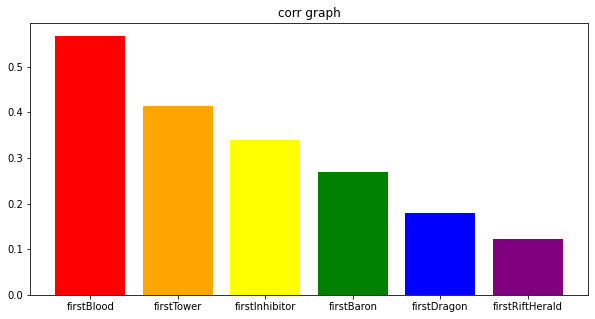

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))

plt.title('corr graph')
plt.bar(first,corr_li,color = ['red', 'orange', 'yellow', 'green','blue','purple']);

In [179]:
data_game[["firstInhibitor","winner"]].groupby(["firstInhibitor"],as_index = False).mean().sort_values(by = "winner",ascending = False)

,firstInhibitor,winner
2,2,1.913299
0,0,1.489274
1,1,1.091609


In [180]:
import seaborn as sns

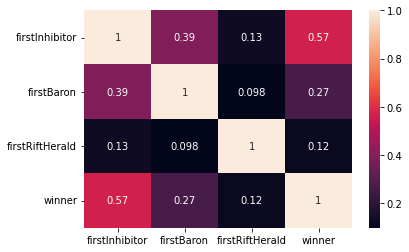

In [181]:
sns.heatmap(data_game[["firstInhibitor","firstBaron","firstRiftHerald","winner"]].corr(),annot = True)
plt.show()

In [182]:
data_game.columns

Index(['gameDuration', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor',
       'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_towerKills',
       't1_inhibitorKills', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_towerKills', 't2_inhibitorKills',
       't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 'spell_use_1',
       'spell_use_2'],
      dtype='object')

여기서 보면 억제기를 2팀이 미는 경우 winner의 평균이 거의 2에 가깝고 억제기를 1팀이 미는 경우 winner의 평균이 거의 1에 가까운것을 확인 할 수 있다.

따라서 억제기를 먼저 미는 것과 승리와의 상관관계가 강하다고 할 수 있다.

# 모델링하기

먼저 타겟(winner)를 이용한 기준 모델 만들기
(타겟의 최빈값을 이용함)

기준모델 : 0.51

In [183]:
from sklearn.metrics import accuracy_score


base_major  = data_game['winner'].mode()[0]
y_pred_base = [base_major] * len(data_game['winner'])
accuracy_score1 = accuracy_score(data_game['winner'], y_pred_base)
accuracy_score1

0.5058886829676571

### 학습 데이터, 검증데이터, 테스트 데이터로 나누기

In [184]:
#여러가지 조건 

#1. 게임 지속시간을 빼고 해보자
# 결과) 게임 지속 시간 칼럼을 빼도 딱히 성능에는 영향이 없으니 빼자

df_game = data_game.copy()
df_game.drop(columns = 'gameDuration',inplace = True)

In [185]:
from sklearn.model_selection import train_test_split


train,test = train_test_split(df_game,test_size = 0.2, random_state = 42)

In [186]:
print(train.shape, test.shape)

(40144, 19) (10037, 19)


피쳐와 타겟에 따라서 X_train,y_train,X_test,y_test 만들기

In [187]:
df_game.columns

Index(['winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_towerKills', 't1_inhibitorKills',
       't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 'spell_use_1', 'spell_use_2'],
      dtype='object')

### 우선 스펠 관련 특성이 굉장히 많은데 이 역시 포함해서 모델을 만들어보고 이후에 빼서 모델을 만들어 보자

X와 y로 나누기

In [188]:
features = df_game.drop(columns = 'winner').columns
target = 'winner'


X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


수치데이터 - 총 타워킬, 총 용 킬 등등

범주형데이터 - 첫번째 용을 먹었나? (1/0) 등등

In [189]:
!pip3 install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [190]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from category_encoders import OrdinalEncoder

In [191]:


pipe_dt = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=1, criterion="entropy", max_depth=6),
)
pipe_dt.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dt.score(X_train, y_train))
print("테스트 정확도: ", pipe_dt.score(X_test, y_test))

y_pred = pipe_dt.predict(X_test)

훈련 정확도:  0.9778796333200478
테스트 정확도:  0.976188104015144


너무 정확도가 크다...

데이터 누수가 의심된다

의심요소 - t1_towerKill과 ,t2_inhibitorKills의 칼럼

- 타워는 한 팀당 11개가 있다. 11개를 다 부순다면 거의 게임이 끝났다는 것을 의미함으로 예측이 쉽게 된다

- 억제기도 억제기가 3개가 밀렸다면 거의 게임이 끝났다는 것을 의미하기 때문에(밀리는 팀이 패배) 예측이 쉽다 

In [192]:
a =  df_game.query('t1_towerKills	== 11')

In [193]:
a.shape[0]

5942

In [194]:
a[a.winner == 2].shape[0]

50

1팀이 2팀 타워를 다부순게 약6000건 정도인데 그중에 2팀이 이긴것은 50건 밖에 안된다. 따라서 예측이 쉬워짐으로 해당 칼럼들을 삭제하고 진행한다

### 여기에서 중복치를 제거하고 다시 성능을 확인하자

In [195]:
df_tower_in = df_game.drop(columns = ['t1_inhibitorKills','t2_inhibitorKills','t1_towerKills','t2_towerKills'])

In [196]:
df_tower_in= df_tower_in.drop_duplicates()

In [197]:
df_tower_in.head()

,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,spell_use_1,spell_use_2
0,1,2,1,1,1,1,2,2,3,0,0,1,1,0,0
1,1,1,1,1,0,1,1,0,2,1,0,0,0,1,0
2,1,2,1,1,1,2,0,1,1,0,0,1,0,1,0
3,1,1,1,1,1,1,0,1,2,0,0,0,0,0,0
4,1,2,1,1,1,1,0,1,3,0,0,1,0,1,1


In [198]:
train,test = train_test_split(df_tower_in,test_size = 0.2, random_state = 42)

features = df_tower_in.drop(columns = 'winner').columns
target = 'winner'


X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [199]:
pipe_dup = make_pipeline(
    OrdinalEncoder(),
    DecisionTreeClassifier(random_state=1, criterion="entropy", max_depth=6),
)
pipe_dup.fit(X_train, y_train)

print("훈련 정확도: ", pipe_dup.score(X_train, y_train))
print("테스트 정확도: ", pipe_dup.score(X_test, y_test))

훈련 정확도:  0.755100104374229
테스트 정확도:  0.7578747628083492


### 부스팅 모델로 성능을 테스트하자

In [224]:
from xgboost import XGBClassifier


pipe_xg = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",  
        n_estimators=200,
        random_state=42,
        n_jobs=-1,
        max_depth=7,
        learning_rate=0.1,
    ),
)

pipe_xg.fit(X_train,y_train)
print("테스트 정확도", pipe_xg.score(X_test, y_test))


테스트 정확도 0.7537001897533206


테스트 정확도 0.7537001897533206


### 하이퍼파라미터 튜닝을 통해서 성능을 올리자

In [227]:
from scipy.stats.distributions import uniform

params = {
    "xgbclassifier__max_depth": [2, 5, 7,12],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__colsample_bytree": uniform(
        loc=0.5, scale=0.5
    ), 
    "xgbclassifier__learning_rate" : uniform(0.05,0.25),
}

In [228]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    pipe_xg,
    param_distributions=params,
    scoring="roc_auc",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.28767857660247903, xgbclassifier__max_depth=7, xgbclassifier__min_child_weight=2;, score=0.783 total time=   1.4s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.28767857660247903, xgbclassifier__max_depth=7, xgbclassifier__min_child_weight=2;, score=0.777 total time=   1.4s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6872700594236812, xgbclassifier__learning_rate=0.28767857660247903, xgbclassifier__max_depth=7, xgbclassifier__min_child_weight=2;, score=0.778 total time=   1.3s
[CV 1/3] END xgbclassifier__colsample_bytree=0.7984250789732434, xgbclassifier__learning_rate=0.1614581882133978, xgbclassifier__max_depth=7, xgbclassifier__min_child_weight=8;, score=0.815 total time=   1.4s
[CV 2/3] END xgbclassifier__colsample_bytree=0.7984250789732434, xgbclassifier__learning_rate=0.1614

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=['spell_use_1',
                                                                   'spell_use_2'],
                                                             mapping=[{'col': 'spell_use_1',
                                                                       'data_type': dtype('O'),
                                                                       'mapping': 0      1
1      2
NaN   -2
dtype: int64},
                                                                      {'col': 'spell_use_2',
                                                                       'data_type': dtype('O'),
                                                                       'mapping': 0      1
1      2
NaN   -2
dtype: int64}])),
                                             ('xgbclassifier',
                                              XGBClass

In [223]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.8659969709057025, 'xgbclassifier__max_depth': 2, 'xgbclassifier__min_child_weight': 2}
최적 AUC:  0.8374229475492787


In [229]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 AUC: ", randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.9916154429033941, 'xgbclassifier__learning_rate': 0.16669072331199497, 'xgbclassifier__max_depth': 2, 'xgbclassifier__min_child_weight': 8}
최적 AUC:  0.8376983962283765


결과
최적 하이퍼파라미터:  {'xgbclassifier__colsample_bytree': 0.8659969709057025, 'xgbclassifier__max_depth': 2, 'xgbclassifier__min_child_weight': 2}
최적 AUC:  0.8374229475492787

특성 중요도 부분

In [205]:
pipe_xg

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['spell_use_1', 'spell_use_2'],
                                mapping=[{'col': 'spell_use_1',
                                          'data_type': dtype('O'),
                                          'mapping': 0      1
1      2
NaN   -2
dtype: int64},
                                         {'col': 'spell_use_2',
                                          'data_type': dtype('O'),
                                          'mapping': 0      1
1      2
NaN   -2
dtype: int64}])),
                ('xgbclassifier',
                 XGBClassifier(eval_metric='error', max_depth=7,
                               n_estimators=200, n_jobs=-1, random_state=42))])

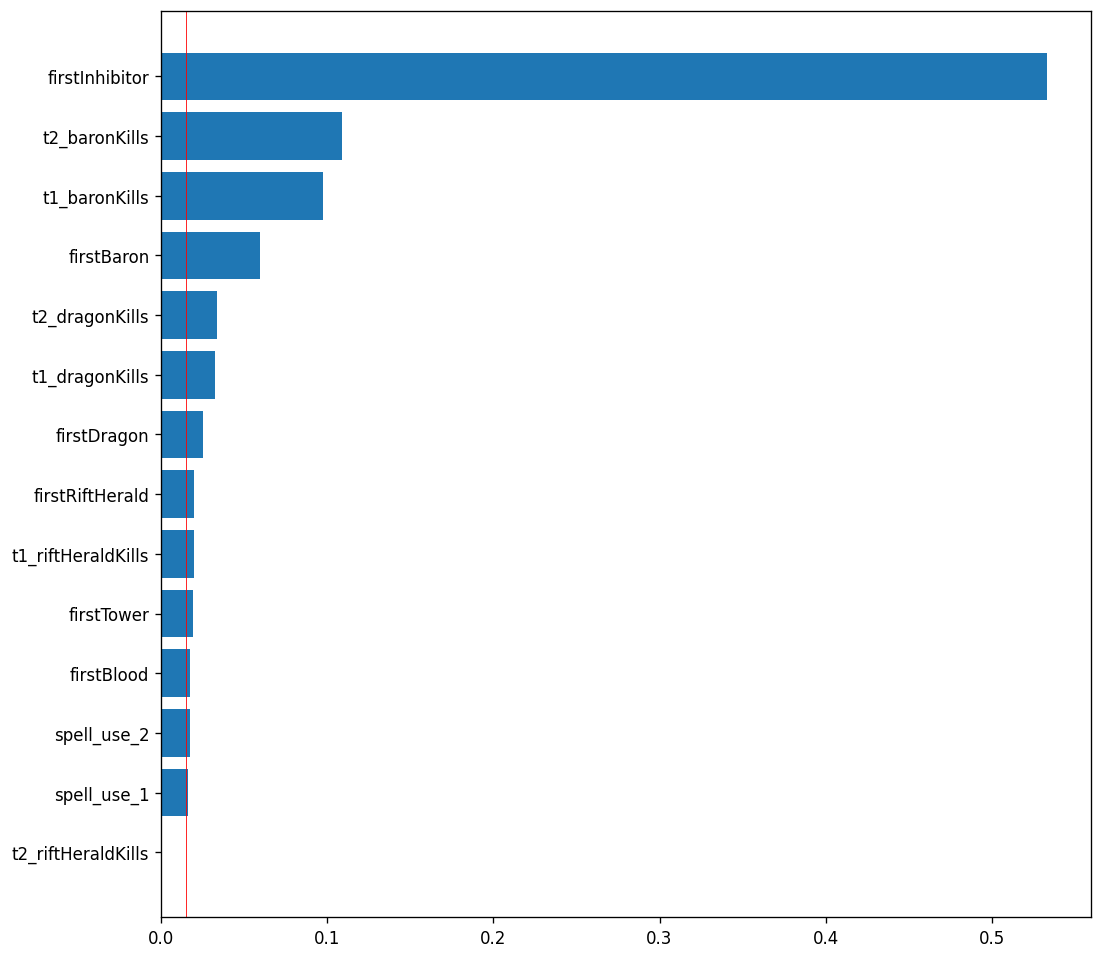

In [206]:
import matplotlib.pyplot as plt

feature_importances = list(
    zip(X_train.columns, pipe_xg.named_steps["xgbclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.015, color="red", linewidth=0.5)

### 알 수 있는점
- 첫번쨰 억제기에 따라서 승패를 예측하기 쉬워진다
- 바론처치에 따라서 영향이 크다
- 바론다음으로는 드래곤 처치가 영향이 크다
- 전령과 용중에서는 용을 우선으로 하자

In [207]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(
    pipe_xg, 
    X_train, 
    y_train, 
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
    )

In [208]:
y_test_pred= pipe_xg.predict(X_test)

### 로지스틱으로 분류할때의 confusion그리기

In [209]:
#기준모델과 로지스틱 회귀모델이 각각 샘플을 어떻게 예측했는지 Confusion Matrix로 확인해보겠습니다.

y_true1 = y_test.value_counts()[1]
y_true2 = y_test.value_counts()[2]
fn = len(y_test_pred) - y_true1
base = pd.DataFrame(index = ['True 1', 'True2'], data = {'Predicted 1':[y_true1, fn], 'Predicted 2':[0,0]})
base

,Predicted 1,Predicted 2
True 1,1290,0
True2,1345,0


In [210]:
y_test.value_counts()

2    1345
1    1290
Name: winner, dtype: int64

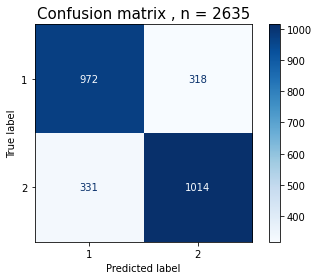

In [233]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_xg, X_test, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.title(f'Confusion matrix , n = {len(y_test)}', fontsize=15)
plt.show()

1팀이 이긴다고 예측해서 성공한 횟수 : 972
2팀이 이긴다고 예측해서 성공한 횟수 : 1014

### pdp plot 그려서 알아보기

In [212]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [213]:
X_test.columns

Index(['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 'spell_use_1', 'spell_use_2'],
      dtype='object')

In [214]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox.pdp import pdp_isolate, pdp_plot



target_features = ["firstDragon", "firstRiftHerald"]

interaction = pdp_interact(
    model=pipe_xg,
    dataset=X_test,
    model_features=X_test.columns,
    features=target_features,
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee8326a4d0>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee8322e4d0>})

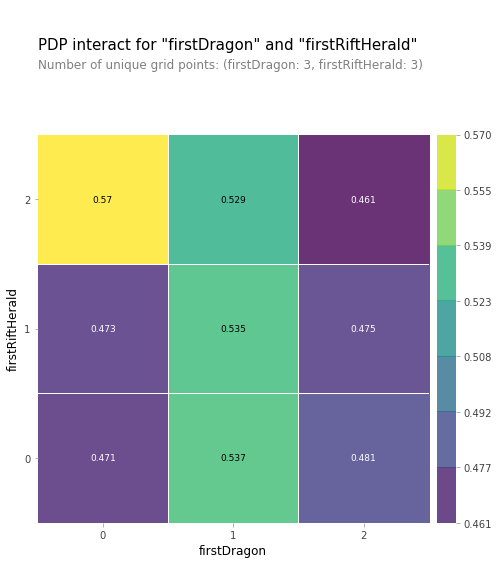

In [215]:
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

위에 그림을 보면 2팀이 이기는 확률이 제일 높은 것은 첫번째 전령을 처치하고 드래곤은 아무도 처치하지 않는 것이다

In [216]:
X_train.columns

Index(['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 'spell_use_1', 'spell_use_2'],
      dtype='object')

In [217]:
target_features = ["t2_baronKills", "t2_dragonKills"]

interaction = pdp_interact(
    model=pipe_xg,
    dataset=X_test,
    model_features=X_test.columns,
    features=target_features,
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee83119950>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7fee830da950>})

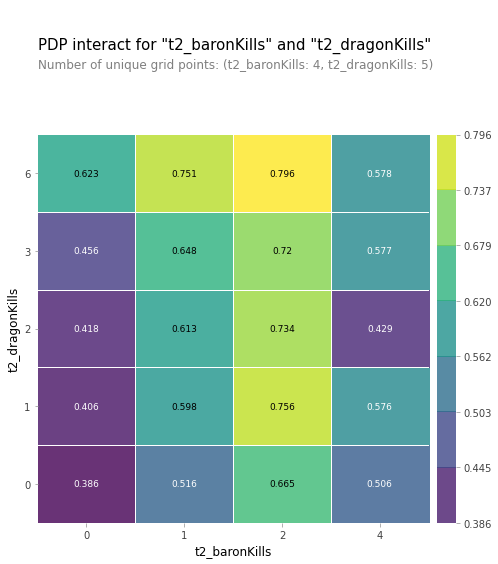

In [218]:
pdp_interact_plot(interaction, plot_type="grid", feature_names=target_features)

이상적인 경우는 용 6마리와 바론 2마리를 처치하는 경우의 0.796 

이때 용의 경우는 4마리만 처치하는 경우가 대다수이기 때문에 데이터의 개수가 적어서 pdp가 자동으로 채워넣어서 이부분은 오류가 발생함


In [230]:
X_train.columns

Index(['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_baronKills', 't1_dragonKills',
       't1_riftHeraldKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHeraldKills', 'spell_use_1', 'spell_use_2'],
      dtype='object')

In [231]:
target_features = ["t2_riftHeraldKills", "t2_dragonKills"]

interaction = pdp_interact(
    model=pipe_xg,
    dataset=X_test,
    model_features=X_test.columns,
    features=target_features,
)

2마리 바론과 1마리 드래곤을 처치하는 것이 가장 이상적이다. 위에는 6마리 드래곤을 처치하는 것은 거의 모든 오브젝트를 획득하는 것이니 어렵다. 이경우에는 이 부분에 데이터가 적은데 이 비율에 맞춰서 나와서 그런 것 같다

아래 코드를 보면 실제로 21경기 밖에 없다

In [219]:
X_train.query('t2_dragonKills == 6').shape[0]

21

특정 상황을 가정하였을때의 승/패 예측하기

In [220]:
X_test

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,spell_use_1,spell_use_2
3963,1,2,1,1,2,2,2,4,0,0,2,1,0,0
3609,2,1,1,0,2,1,0,0,1,0,2,0,1,1
8414,1,2,2,2,2,0,0,4,0,1,1,0,0,1
17482,2,2,1,2,2,0,0,0,0,1,3,0,0,0
1108,1,2,1,1,2,0,2,1,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,2,1,0,2,2,1,0,0,1,1,2,0,0,1
1404,2,1,2,2,1,1,0,2,1,1,1,0,0,0
3944,2,1,1,2,2,1,0,2,1,1,1,0,0,0
36172,2,2,0,0,2,1,0,0,1,0,3,0,0,1


In [221]:
pipe_xg.predict_proba(X_test)

array([[0.950269  , 0.04973103],
       [0.8591199 , 0.14088011],
       [0.1321078 , 0.8678922 ],
       ...,
       [0.6105161 , 0.38948393],
       [0.02911204, 0.97088796],
       [0.09335363, 0.9066464 ]], dtype=float32)

In [ ]:
df_game = df_game.drop(columns = ['spell_use_1','spell_use_2'])

### 상황을 가정하고 승리 예측하기

- 만약 1팀이 모든 첫번째 처치를 다 하였지만 2팀이 상관관계가 가장 높은 첫번째 억제기를 파괴하였을때 어느 팀이 이길까??

- 첫번째 팀의 파괴한 타워 : 10, 억제기 : 2 바론 : 1, 드래곤 : 4, 전령 : 1

- 두번째 팀의 파괴한 타워 : 7, 억제기 : 2 바론 : 1, 드래곤 : 1, 전령 : 2



In [242]:
# 데이터를 시험삼아 넣어보고 예측하기




y = df_game["winner"].values
x = df_game.drop(["winner"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [243]:
dt2=DecisionTreeClassifier(criterion="entropy",max_depth=7, splitter="best")
dt2.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [249]:
x1=[[1,1,2,1,1,1,10,2,1,4,1,7,2,1,1,2]]
c=dt2.predict_proba(x1).reshape(-1,1)
print("winner is :" , dt2.predict(x1) )
print("first team win probability is % ", list(c[0]*100),"\nsecond team win probability is %:",list(c[1]*100)  )

winner is : [1]
first team win probability is %  [86.51685393258427] 
second team win probability is %: [13.48314606741573]


1팀이 이길확률이 약 86%정도 되었다.

# 결론

- 챔피언은 쓰레쉬라는 챔피언과 트리스타나라는 챔피언이 가장 많이 픽이 되는 것으로 보아서 현재 가장 성능이 좋다고 여길 수 있다. 이경우에는 챔피언을 후픽하는 경우에는 오히려 금지시키는 것도 도움이  된다.

- 많이 쓰이는 소환사 주문은 점멸 말고도 텔레포트, 탈진등이 있었고 방어막이나 유체화의 경우 쓰이는 경우가 적다.

- 억제기를 제외하고 가장 승리와 상관관계가 높은 것은 바론 처치였다. 만약 바론처치가 가능한 상황이면 바론처치를 목표로 한다.


- 바론이 나오기 전에는 전령과 드래곤만 출현하는데 이 때 전령을 처치하는 것보다 드래곤을 처치하는 것이 승률이 더 높았다. 따라서 드래곤을 먼저 처치하는 쪽으로 목표를 잡는다
